In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [254]:
#load the data
alpha_data=pd.read_csv("Downloads/Neural networks/Neural networks/Alphabets_data.csv")
#Exploratory Datasets
print("Total missing Values in the train dataset:",alpha_data.isna().sum().sum())
#find duplicates in  dataset
print("No.of duplicate in train datasets:",end=" ")
print(alpha_data.duplicated().sum()) 
alpha_data=alpha_data.drop_duplicates()
#check any duplicate in dataset after drop
print("No.of duplicate in datasets after drop:",end=" ")
print(alpha_data.duplicated().sum())
print(alpha_data.head(5))

Total missing Values in the train dataset: 0
No.of duplicate in train datasets: 1332
No.of duplicate in datasets after drop: 0
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


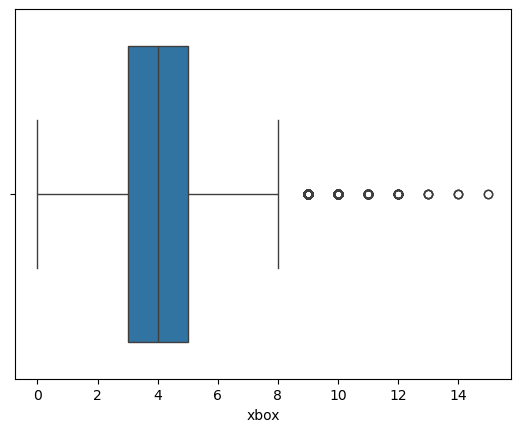

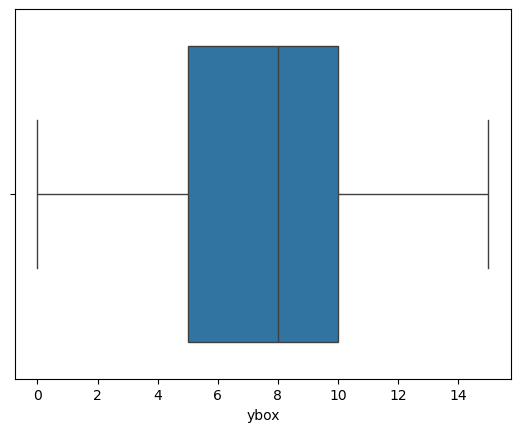

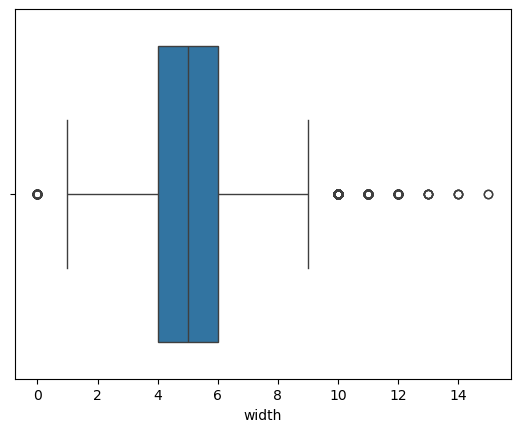

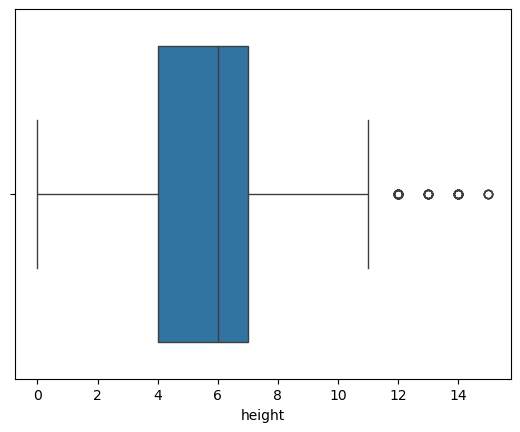

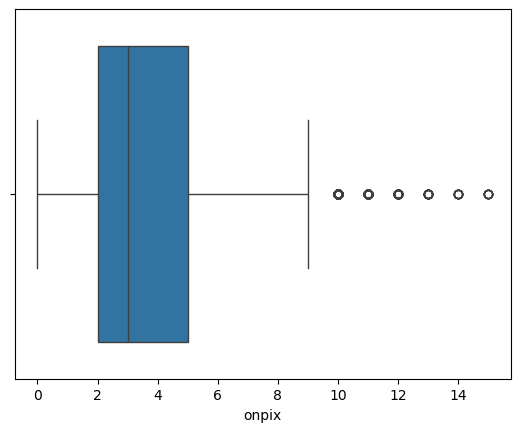

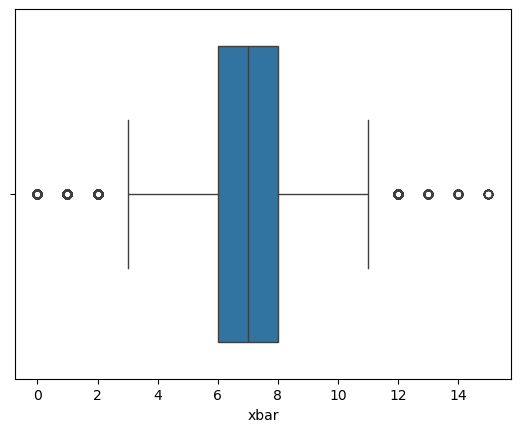

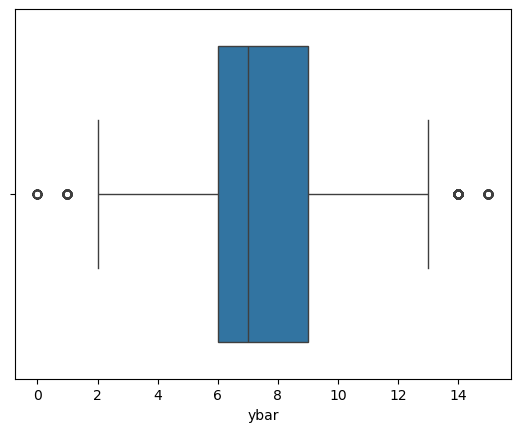

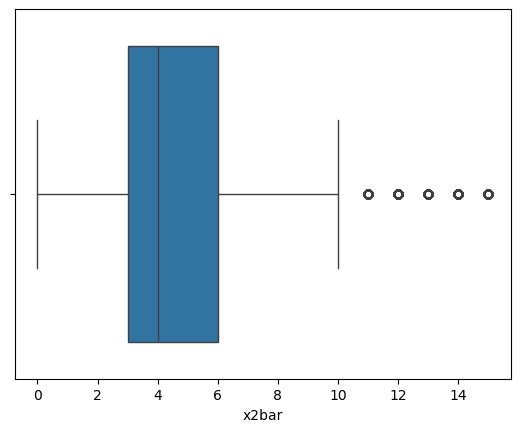

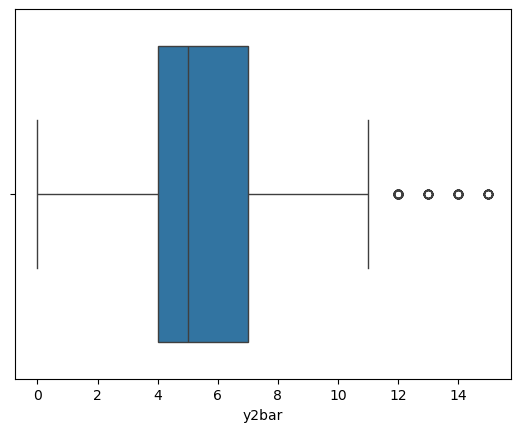

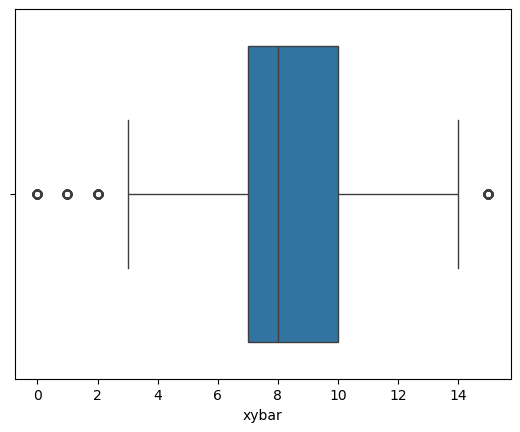

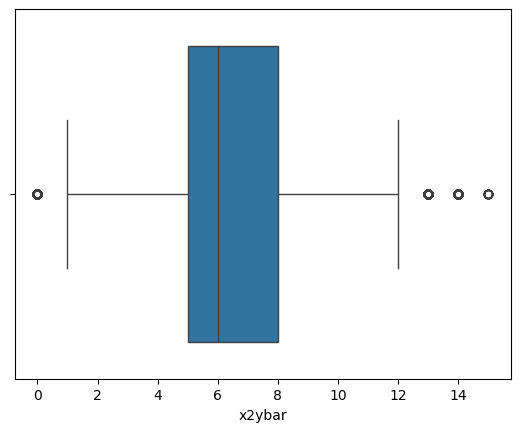

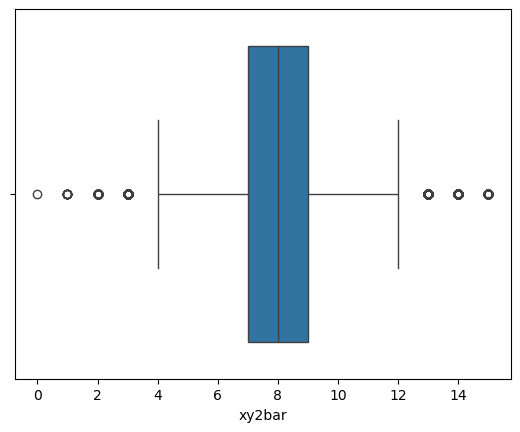

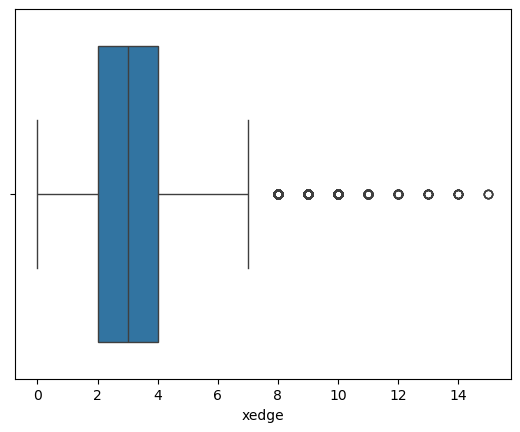

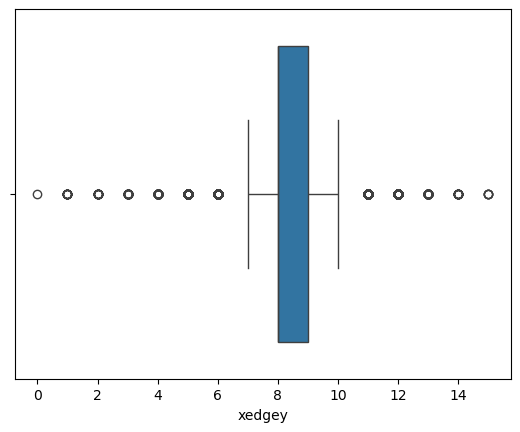

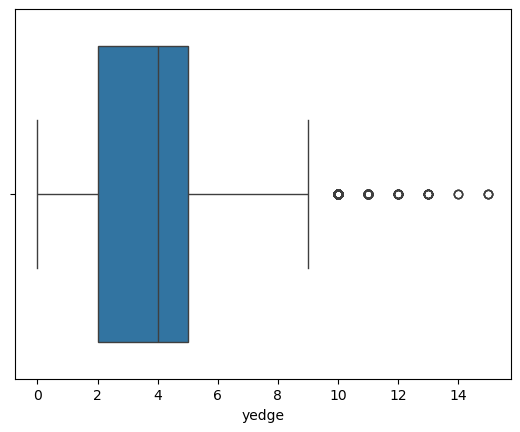

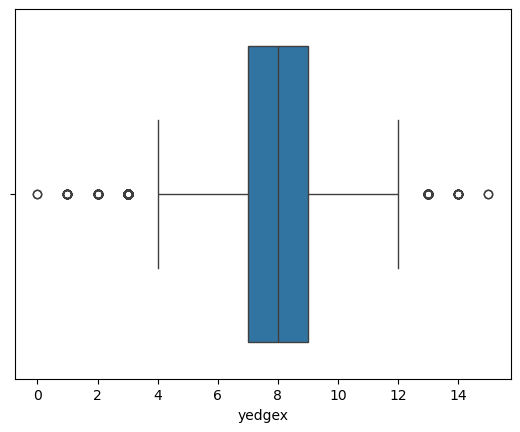

In [256]:
##Find outliers using boxplot for  dataset
for i in alpha_data.select_dtypes(include="number").columns:
    sns.boxplot(data=alpha_data,x=i)
    plt.show()

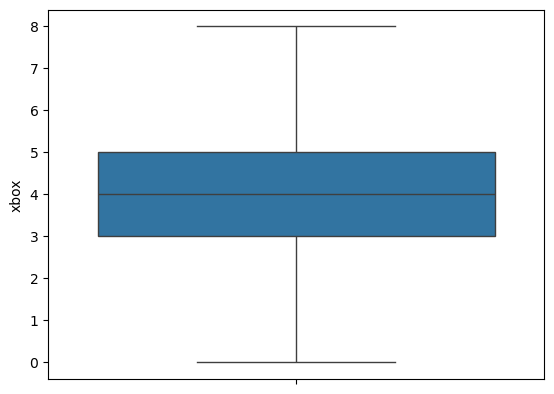

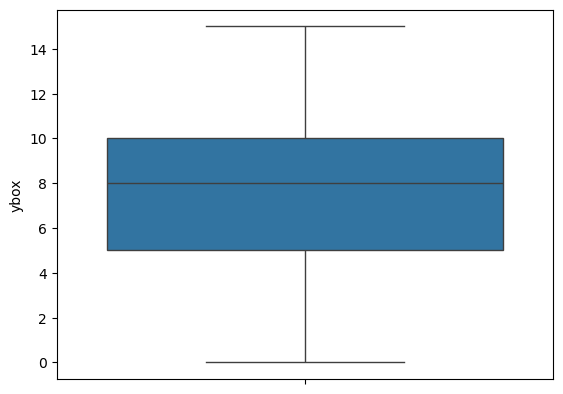

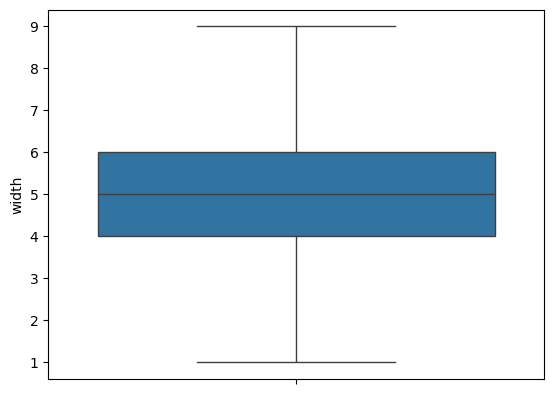

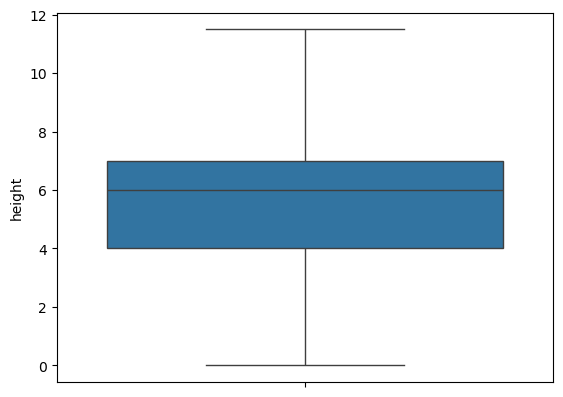

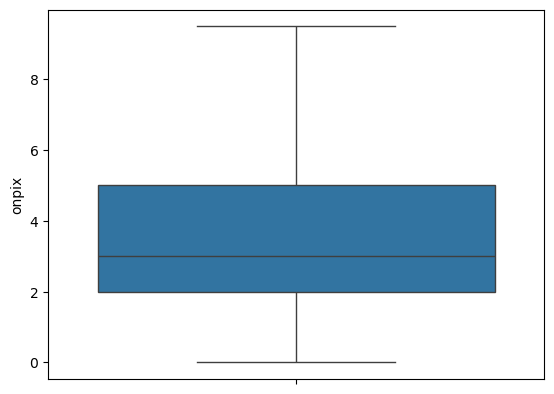

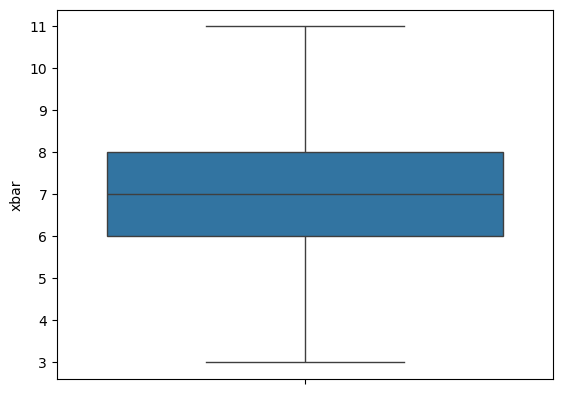

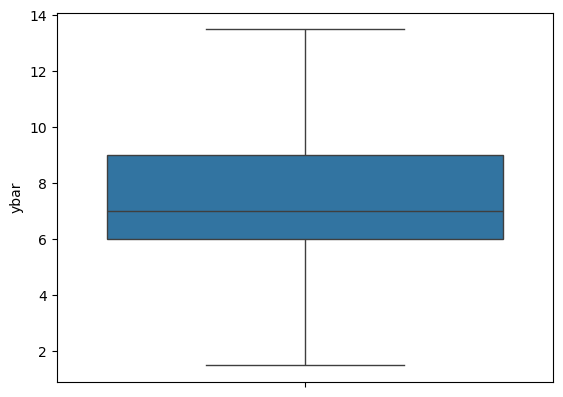

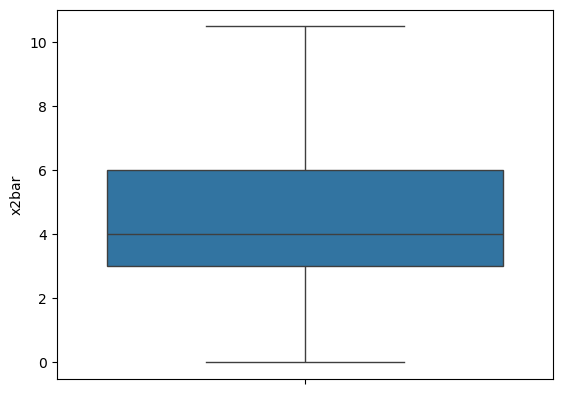

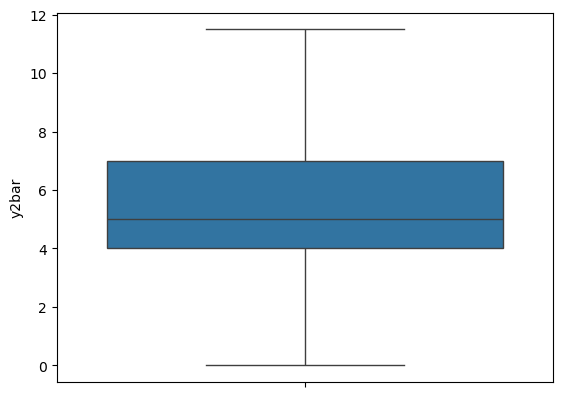

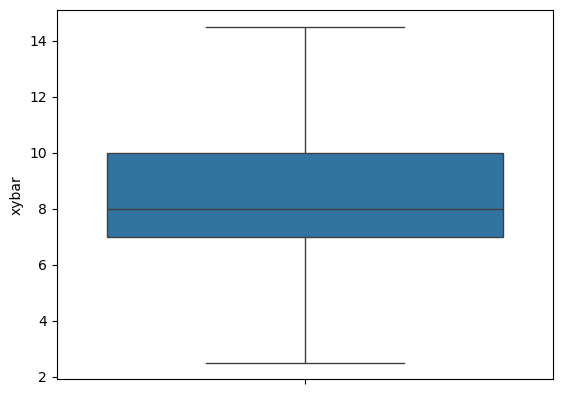

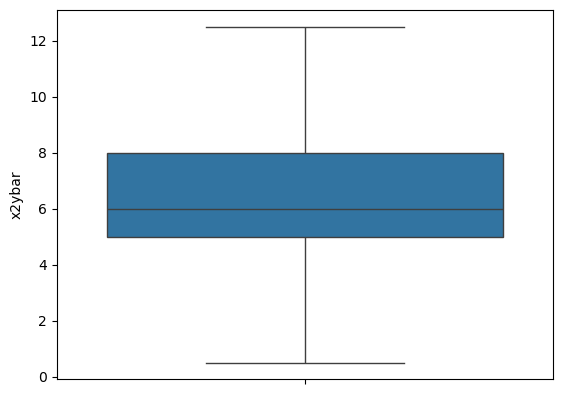

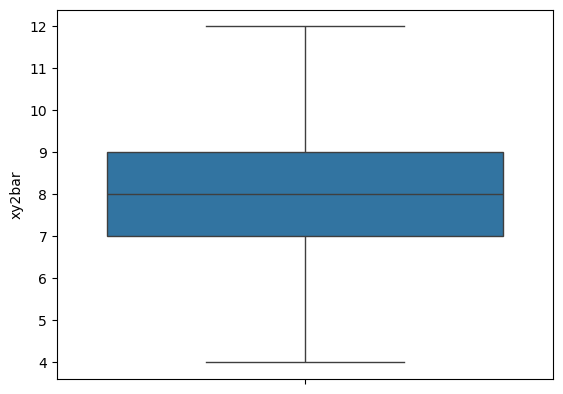

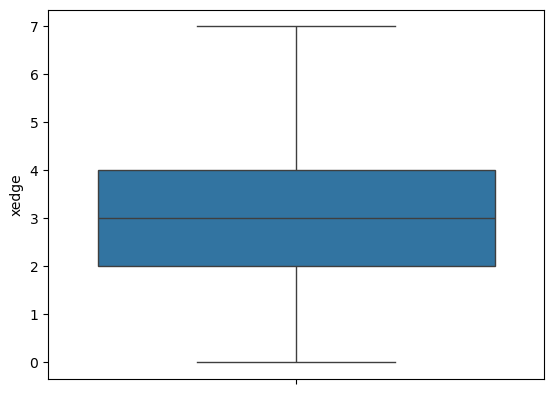

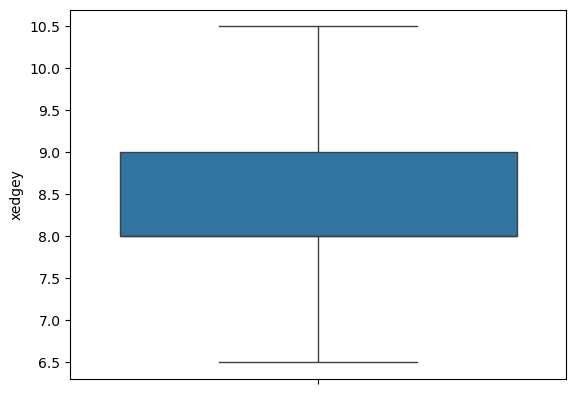

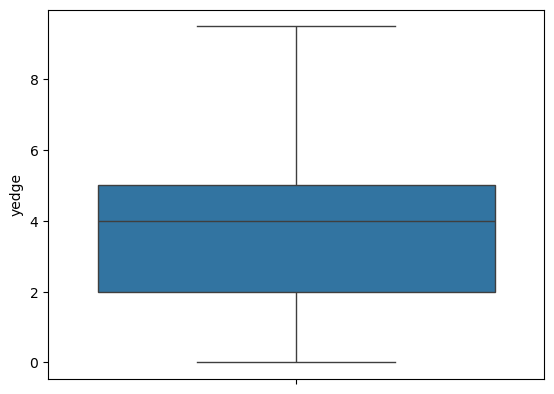

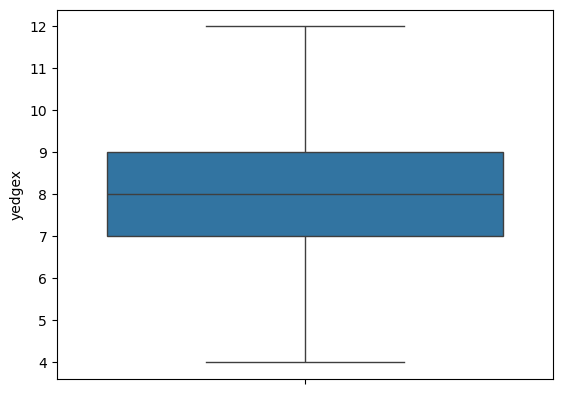

In [257]:
#Treatment for outliers/boxplot capping for  data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in alpha_data.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(alpha_data[i])
    alpha_data[i]=np.where(alpha_data[i]<lower,lower,alpha_data[i])
    alpha_data[i]=np.where(alpha_data[i]>upper,upper,alpha_data[i])

#box plot after capping  train dataset
for i in alpha_data.select_dtypes(include="number").columns:
    sns.boxplot(alpha_data[i])
    plt.show()

In [260]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
alpha_data["letter"]=label.fit_transform(alpha_data["letter"])
print(alpha_data.dtypes)

letter      int32
xbox      float64
ybox      float64
width     float64
height    float64
onpix     float64
xbar      float64
ybar      float64
x2bar     float64
y2bar     float64
xybar     float64
x2ybar    float64
xy2bar    float64
xedge     float64
xedgey    float64
yedge     float64
yedgex    float64
dtype: object


In [262]:
#select the train and test data
x=alpha_data.drop(columns=["letter"])
y=alpha_data["letter"]

In [264]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=25)

In [266]:
#scale the data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [268]:
#Build the model
from sklearn.neural_network import MLPClassifier
ml=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=1000)
y=ml.fit(x_train,y_train)
print(y)

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


In [270]:
#prediction value
y_pred=ml.predict(x_test)
print(y_pred)


[22  0 16 ... 19 12 10]


In [272]:
#confusion matrix 
print("Confusion matrix are:")
print(confusion_matrix(y_test,y_pred))

Confusion matrix are:
[[127   0   0   0   0   0   1   1   0   1   0   1   3   0   0   0  10   0
    0   0   2   0   0   0   6   0]
 [  0 111   0   3   2   0   0   1   0   0   1   0   2   0   0   6   0  13
    8   0   0   1   0   0   2   1]
 [  0   0  99   0   8   3  11   0   0   1   3   0   1   0   6   0   0   1
    1   0   5   0   0   0   0   0]
 [  0  13   0  76   1   0   2  10   0   2   0   0   2   2   9   5   1   9
    3   0   0   0   0   2   0   0]
 [  0   2   2   1 100   0   3   0   0   0   2   0   0   0   0   0   8   4
    8   0   0   0   0   5   0   1]
 [  0  18   0   7   0 101   1   0   3   1   0   0   0   0   0   9   0   2
    2   1   0   0   0   1   0   0]
 [  0   4  11   2   0   0  88   1   0   1   1   0   1   0   4   1  11  16
    3   0   1   2   0   0   0   0]
 [  0   3   1  18   0   0   0  64   0   0   6   0   3   0   5   0   3   9
    0   0   1   1   1   1   7   2]
 [  1   2   1   2   0   2   0   0  60  11   0   2   0   0   0   3   2   0
   13   0   0   0   0   1   0   

In [274]:
#classification report
from sklearn.datasets import make_classification
print("The classification report")
print(classification_report(y_test,y_pred))


The classification report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       152
           1       0.59      0.74      0.65       151
           2       0.79      0.71      0.75       139
           3       0.58      0.55      0.57       137
           4       0.69      0.74      0.71       136
           5       0.74      0.69      0.72       146
           6       0.67      0.60      0.63       147
           7       0.57      0.51      0.54       125
           8       0.86      0.60      0.71       100
           9       0.75      0.77      0.76       142
          10       0.76      0.73      0.74       139
          11       0.92      0.69      0.79       121
          12       0.71      0.81      0.76       146
          13       0.86      0.78      0.82       147
          14       0.62      0.78      0.69       156
          15       0.80      0.84      0.82       186
          16       0.64      0.76      0.69       152
 

In [288]:
from sklearn.neural_network import MLPRegressor
ml=MLPRegressor()
y=ml.fit(x_train,y_train)
print(y)

MLPRegressor()


C:\Users\rskar\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [290]:
y_pred=ml.predict(x_test)
print(y_pred)

[21.50052964  0.14327026 17.15346903 ... 18.36848149 12.2865141
 13.7280194 ]


In [292]:
from sklearn import metrics
print("Mean squared error for regressor ",end="")
ms=metrics.mean_squared_error(y_test,y_pred)
print(ms)
print("Regression Squared score ",end="")
rs=metrics.r2_score(y_test,y_pred)
print(rs)

Mean squared error for regressor 14.478666859201585
Regression Squared score 0.7446434138113457


<Axes: xlabel='letter'>

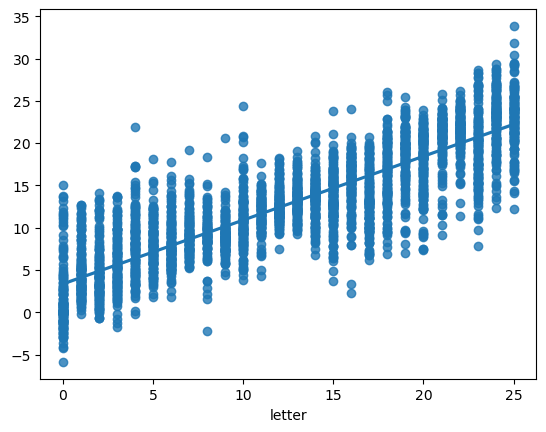

In [294]:
#plot for regressor unit
sns.regplot(x=y_test,y=y_pred)

In [296]:
#Logistic sigmoid function
from sklearn.neural_network import MLPRegressor
mlr=MLPRegressor(hidden_layer_sizes=(100,100,),activation="logistic",max_iter=1000)
yr=mlr.fit(x_train,y_train)
print(yr)

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 100),
             max_iter=1000)


In [298]:
yr_pred=mlr.predict(x_test)
print(yr_pred)



[2.20914364e+01 1.57142645e-02 1.72169820e+01 ... 2.03634058e+01
 1.59480726e+01 1.55587069e+01]


In [300]:
from sklearn import metrics
print("Mean squared error for logistic regressor ",end="")
mse=metrics.mean_squared_error(y_test,yr_pred)
print(mse)
print("Regression Squared score ",end="")
rse=metrics.r2_score(y_test,yr_pred)
print(rse)

Mean squared error for logistic regressor 8.397009882725081
Regression Squared score 0.8519040600424926


<Axes: xlabel='letter'>

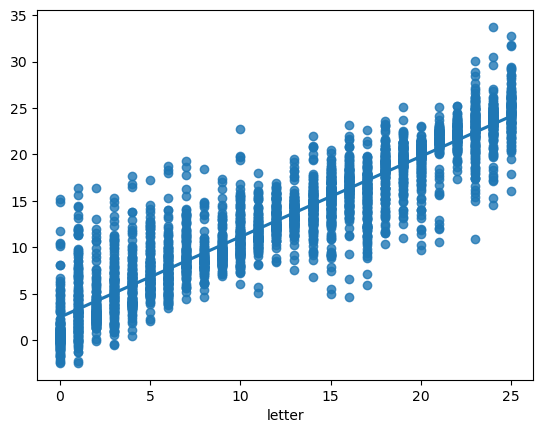

In [302]:
#plot for logistic regressor unit
sns.regplot(x=y_test,y=yr_pred)

In [304]:
#tanh(Hyperbolic tan function)
mlrt=MLPRegressor(hidden_layer_sizes=(100,100,),activation="tanh",max_iter=1000)
yrt=mlrt.fit(x_train,y_train)
print(yrt)

MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000)


In [305]:
yrt_pred=mlrt.predict(x_test)
print(yrt_pred)

[20.76136376 -0.3005681  15.13025884 ... 18.46594358 15.68014905
 11.16079425]


In [308]:
print("Mean squared error for Hyperbolic tan regressor ",end="")
mset=metrics.mean_squared_error(y_test,yrt_pred)
print(mset)
print("Regression Squared score ",end="")
rset=metrics.r2_score(y_test,yrt_pred)
print(rset)

Mean squared error for Hyperbolic tan regressor 4.91226767341423
Regression Squared score 0.913363577204572


<Axes: xlabel='letter'>

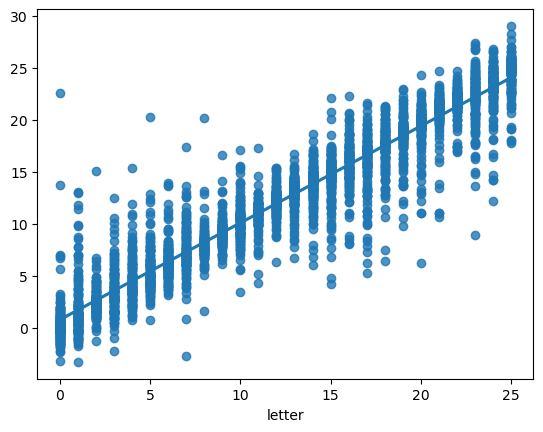

In [310]:
#plot for Hyperbolic tan unit
sns.regplot(x=y_test,y=yrt_pred)

In [312]:
#Relu(Rectfied linear function)
mlrr=MLPRegressor(hidden_layer_sizes=(100,100,),activation="relu",max_iter=1000)
yrr=mlrr.fit(x_train,y_train)
print(yrr)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)


In [316]:
yrr_pred=mlrt.predict(x_test)
print(yrr_pred)

[20.76136376 -0.3005681  15.13025884 ... 18.46594358 15.68014905
 11.16079425]


In [318]:
print("Mean squared error for rectified linear unit regressor ",end="")
mser=metrics.mean_squared_error(y_test,yrr_pred)
print(mser)
print("Regression Squared score ",end="")
rser=metrics.r2_score(y_test,yrr_pred)
print(rser)

Mean squared error for rectified linear unit regressor 4.91226767341423
Regression Squared score 0.913363577204572


<Axes: xlabel='letter'>

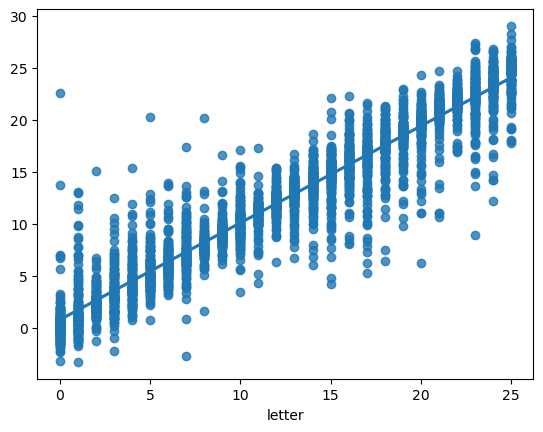

In [320]:
#plot for rectified linear unit
sns.regplot(x=y_test,y=yrr_pred)

In [ ]:
#mlpclassifier: precision=73% and recall=72%
#mlpregressor with hypertuning parameter r squared score=74.4%
#mlpregressor logistic with hypertuning parameter r squared score=85%
#mlpregressor tanh with hypertuning parameter r squared score=91%
#mlpregressor rectified linear with hypertuning parameter r squared score=91%
#with hypertuning